In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


bredasdorp za
kaitangata nz
belmonte br
mehamn no
bodden town ky
yellowknife ca
barentsburg sj
kapaa us
bluff nz
pevek ru
longyearbyen sj
hamilton bm
hermanus za
lopsmarka no
barentsburg sj
attawapiskat ca
ban nahin la
maldonado uy
port alfred za
cape town za
hobart au
jamestown sh
cabedelo br
peleduy ru
punta arenas cl
barentsburg sj
slave lake ca
redwater ca
lavrentiya ru
taolanaro mg
bundaberg au
hithadhoo mv
qaanaaq gl
leshukonskoye ru
qaanaaq gl
east london za
illoqqortoormiut gl
hovd mn
keokuk us
ushuaia ar
georgetown sh
bouna ci
katsuura jp
rikitea pf
dikson ru
coihaique cl
atambua id
simao cn
albany au
vaini to
mataura pf
aykhal ru
mataura pf
cape town za
quatre cocos mu
ushuaia ar
flinders au
chukhloma ru
isangel vu
skibbereen ie
mataura pf
hilo us
thompson ca
sao filipe cv
ushuaia ar
yabelo et
ponta do sol cv
rikitea pf
los llanos de aridane es
qaanaaq gl
dikson ru
ribeira grande pt
kahului us
kapaa us
butaritari ki
yichang cn
saint-philippe re
lebu cl
monroe us
nikolskoye ru

muros es
hofn is
rikitea pf
khatanga ru
provideniya ru
windhoek na
palmer us
vaini to
ulaangom mn
cherskiy ru
labuan my
sitka us
aksha ru
puerto ayora ec
ilulissat gl
hermanus za
otane nz
hithadhoo mv
chapais ca
saldanha za
sinnamary gf
lebu cl
busselton au
punta arenas cl
bluff nz
narsaq gl
taksimo ru
kargil in
puerto ayora ec
ostrovnoy ru
teya ru
vaini to
hobart au
chuy uy
longyearbyen sj
ghanzi bw
luderitz na
kaabong ug
pangnirtung ca
zelenodolsk ru
provideniya ru
atuona pf
vaini to
saint-michel-des-saints ca
east london za
dikson ru
saint george bm
upernavik gl
francistown bw
busselton au
albany au
jiddah sa
saint-philippe re
kasongo-lunda cd
hermanus za
iqaluit ca
ushuaia ar
shimoda jp
nanakuli us
kununurra au
buchanan lr
bathsheba bb
kerema pg
owando cg
taoudenni ml
corinto br
aklavik ca
rio novo br
hilo us
sulina ro
barrow us
hambantota lk
gorin ru
palma di montechiaro it
maibong in
busselton au
ushuaia ar
sentyabrskiy ru
chokurdakh ru
san angelo us
ushuaia ar
upernavik gl
ponta

usinsk ru
albany au
verkhnevilyuysk ru
jacareacanga br
punta arenas cl
aksu cn
qaanaaq gl
cabacao ph
chuy uy
anakapalle in
amga ru
port hedland au
dongling cn
kawalu id
chuy uy
rikitea pf
port elizabeth za
port alfred za
norman wells ca
castro cl
thompson ca
moose factory ca
busselton au
tumannyy ru
barrow us
dikson ru
atuona pf
ushuaia ar
busselton au
mataura pf
alghero it
bluff nz
kalmunai lk
taltal cl
najran sa
luderitz na
severo-kurilsk ru
vaini to
bardiyah ly
dunedin nz
carutapera br
oinoussai gr
mount gambier au
tumannyy ru
barentsburg sj
xuddur so
moose factory ca
saskylakh ru
lolua tv
puerto carreno co
jamestown sh
arica cl
talnakh ru
bluff nz
nanortalik gl
geraldton au
la macarena co
namatanai pg
teknaf bd
victoria sc
pevek ru
illoqqortoormiut gl
ayorou ne
williamsburg us
punta arenas cl
east london za
naze jp
alice springs au
port alfred za
hilo us
qaanaaq gl
atuona pf


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ac2e4786cf2f619d410e21ee95a035a


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ac2e4786cf2f619d410e21ee95a035a&q=Boston


In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | belmonte
Processing Record 4 of Set 1 | mehamn
Processing Record 5 of Set 1 | bodden town
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | lopsmarka
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | ban nahin
Processing Record 17 of Set 1 | maldonado
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | jamestown
Processing Recor

Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | cayenne
Processing Record 45 of Set 4 | andarab
City not found. Skipping...
Processing Record 46 of Set 4 | calvinia
Processing Record 47 of Set 4 | bandarbeyla
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | rungata
City not found. Skipping...
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | nichinan
Processing Record 2 of Set 5 | lysva
Processing Record 3 of Set 5 | yuzhou
Processing Record 4 of Set 5 | baykit
Processing Record 5 of Set 5 | meadow lake
Processing Record 6 of Set 5 | nantucket
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | eyrarbakki
Processing Record 9 of Set 5 | hearst
Processing Record 10 of Set 5 | vestmanna
Processing Record 11 of Set 5 | san rafael
Processing Record 12 of Set 5 | asht
City not found. Skipping...
Processing Record 13 of Set 5 | kieta
Processing Record 14 of Set 5 | fukuma
Proce

Processing Record 32 of Set 8 | kerema
Processing Record 33 of Set 8 | owando
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | corinto
Processing Record 36 of Set 8 | aklavik
Processing Record 37 of Set 8 | rio novo
Processing Record 38 of Set 8 | sulina
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | gorin
Processing Record 41 of Set 8 | palma di montechiaro
Processing Record 42 of Set 8 | maibong
Processing Record 43 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 8 | san angelo
Processing Record 45 of Set 8 | carutapera
Processing Record 46 of Set 8 | kajaani
Processing Record 47 of Set 8 | olinda
Processing Record 48 of Set 8 | thoen
Processing Record 49 of Set 8 | chumikan
Processing Record 50 of Set 8 | severo-kurilsk
Processing Record 1 of Set 9 | dekar
Processing Record 2 of Set 9 | kloulklubed
Processing Record 3 of Set 9 | the valley
Processing Record 4 of Set 9 | santa cruz
Processing Record 

Processing Record 14 of Set 12 | bonga
Processing Record 15 of Set 12 | mahibadhoo
Processing Record 16 of Set 12 | saint-ambroise
Processing Record 17 of Set 12 | puerto baquerizo moreno
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | fort-shevchenko
Processing Record 20 of Set 12 | gairo
Processing Record 21 of Set 12 | fairbanks
Processing Record 22 of Set 12 | areosa
Processing Record 23 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 24 of Set 12 | ancud
Processing Record 25 of Set 12 | linxia
Processing Record 26 of Set 12 | mantua
Processing Record 27 of Set 12 | monrovia
Processing Record 28 of Set 12 | abdulino
Processing Record 29 of Set 12 | breves
Processing Record 30 of Set 12 | el alto
Processing Record 31 of Set 12 | novopokrovka
Processing Record 32 of Set 12 | syriam
Processing Record 33 of Set 12 | nguiu
City not found. Skipping...
Processing Record 34 of Set 12 | sept-iles
Processing Record 35 of Set 12 | volchanets
Proces

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,50.00,87,0,5.82,ZA,2020-07-28 21:29:36
1,Kaitangata,-46.28,169.85,51.01,56,57,1.99,NZ,2020-07-28 21:29:36
2,Belmonte,-15.86,-38.88,73.40,69,20,8.05,BR,2020-07-28 21:29:36
3,Mehamn,71.04,27.85,57.20,87,34,1.12,NO,2020-07-28 21:29:36
4,Bodden Town,19.28,-81.25,89.60,66,20,13.87,KY,2020-07-28 21:29:36
...,...,...,...,...,...,...,...,...,...
564,Arica,-18.48,-70.30,60.80,72,8,10.29,CL,2020-07-28 21:27:37
565,La Macarena,2.18,-73.78,83.46,66,32,1.07,CO,2020-07-28 21:30:33
566,Teknaf,20.86,92.31,80.83,85,100,6.15,BD,2020-07-28 21:30:33
567,Ayorou,14.73,0.92,92.80,40,33,2.64,NE,2020-07-28 21:30:33


In [25]:
new_column_order = ["City", "Country", "Date", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-07-28 21:29:36,-34.53,20.04,50.00,87,0,5.82
1,Kaitangata,NZ,2020-07-28 21:29:36,-46.28,169.85,51.01,56,57,1.99
2,Belmonte,BR,2020-07-28 21:29:36,-15.86,-38.88,73.40,69,20,8.05
3,Mehamn,NO,2020-07-28 21:29:36,71.04,27.85,57.20,87,34,1.12
4,Bodden Town,KY,2020-07-28 21:29:36,19.28,-81.25,89.60,66,20,13.87
...,...,...,...,...,...,...,...,...,...
564,Arica,CL,2020-07-28 21:27:37,-18.48,-70.30,60.80,72,8,10.29
565,La Macarena,CO,2020-07-28 21:30:33,2.18,-73.78,83.46,66,32,1.07
566,Teknaf,BD,2020-07-28 21:30:33,20.86,92.31,80.83,85,100,6.15
567,Ayorou,NE,2020-07-28 21:30:33,14.73,0.92,92.80,40,33,2.64


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/29/20'

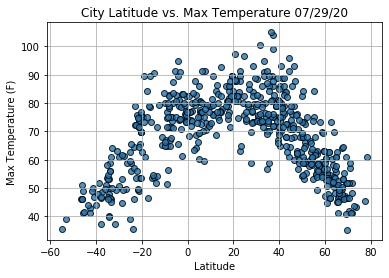

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

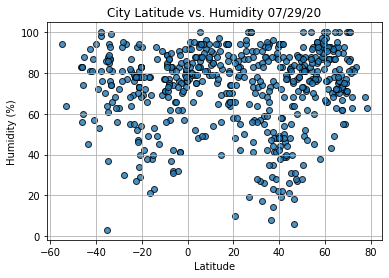

In [33]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

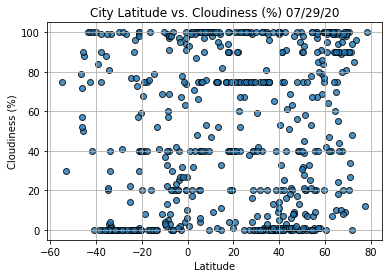

In [34]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

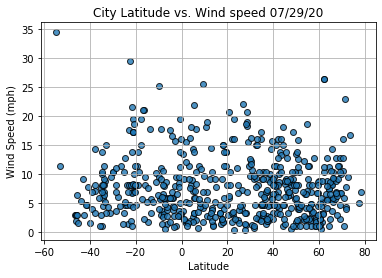

In [38]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities") 

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()